# Tanzania - (most) wrangling done

Import csv file

In [45]:
import numpy as np
import pandas as pd
import matplotlib as plot
import seaborn as sns

df = df = pd.read_csv('/Users/RAhmed/data store/Wesleyan_Capstone/corrected_data04.csv')
df.head()

,id,date_recorded,season_recorded,gps_height,installer,longitude,latitude,basin,region_code,population,...,construction_year,extraction_type_group,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type_group,status_group
0,20163,2013.129032,short_dry,330,DANIDA,37.351138,-11.649440,Ruvuma / Southern Coast,10,1,...,1994.0,swn 80,user-group,annually,soft,insufficient,borehole,groundwater,hand pump,functional needs repair
1,42800,2013.129032,short_dry,327,DANIDA,37.351869,-11.648378,Ruvuma / Southern Coast,10,1,...,1994.0,swn 80,user-group,annually,soft,enough,borehole,groundwater,hand pump,functional needs repair
2,57360,2013.120968,short_dry,439,TASAF,37.082702,-11.586297,Ruvuma / Southern Coast,10,1,...,2010.0,swn 80,user-group,never pay,soft,insufficient,borehole,groundwater,hand pump,non functional
3,338,2013.145161,short_dry,559,MKONGO CONSTRUCTION,36.463786,-11.568577,Ruvuma / Southern Coast,10,500,...,2011.0,other,unknown,unknown,soft,unknown,borehole,groundwater,other,non functional
4,51453,2013.145161,short_dry,568,DWE,36.465277,-11.566805,Ruvuma / Southern Coast,10,100,...,2003.0,swn 80,user-group,monthly,soft,dry,shallow well,groundwater,hand pump,non functional


# Get rid of NaNs

Explore using Roland Jeannier's function

In [46]:
def eda_helper(df):
   dict_list = []
   for col in df.columns:
       data = df[col]
       dict_ = {}
       # The null count for a column. 
       dict_.update({"null_count" : data.isnull().sum()})
       # Counting the unique values in a column
       dict_.update({"unique_count" : len(data.unique())})
       # Finding the types of data in the column
       # This is useful for finding out potential problems with type mismatches
       dict_.update({"data_type" : set([type(d).__name__ for d in data])})
       #dict_.update({"score" : match[1]})
       dict_list.append(dict_)
   eda_df = pd.DataFrame(dict_list)
   eda_df.index = df.columns
   eda_df.sort_values(by=['null_count', 'unique_count'], ascending=[True, False], inplace=True)
       
   return eda_df

In [47]:
print(eda_helper(df))

                           data_type  null_count  unique_count
id                             {int}           0          9400
longitude                    {float}           0          7589
latitude                     {float}           0          7589
gps_height                     {int}           0          1580
wpt_age                      {float}           0          1274
date_recorded                {float}           0           184
construction_year            {float}           0           165
extraction_type_group          {str}           0            12
region_code                    {int}           0            11
population                     {str}           0             9
water_quality                  {str}           0             8
payment_type                   {str}           0             7
source_type                    {str}           0             7
basin                          {str}           0             5
management_group               {str}           0       

Make the right variables categorical

In [48]:
categories = {'extraction_type_group', 'region_code', 'population', 'water_quality',
             'payment_type', 'source_type', 'basin', 'management_group', 'quantity_group',
              'season_recorded', 'waterpoint_type_group', 'source_class','status_group', 'permit',
              'installer', 'scheme_management', 'public_meeting'
             }
for item in categories:
    df[item] = df[item].astype('category')
# check types
df.dtypes

id                          int64
date_recorded             float64
season_recorded          category
gps_height                  int64
installer                category
longitude                 float64
latitude                  float64
basin                    category
region_code              category
population               category
public_meeting           category
scheme_management        category
permit                   category
wpt_age                   float64
construction_year         float64
extraction_type_group    category
management_group         category
payment_type             category
water_quality            category
quantity_group           category
source_type              category
source_class             category
waterpoint_type_group    category
status_group             category
dtype: object

In [49]:
max(df['date_recorded'])

2013.924731182796

In [50]:
min(df['date_recorded'])

2004.1693548387095

# Initial looks at categorical variables

In [51]:
df['season_recorded'].value_counts()

short_dry      46170
long_dry        6483
long_rainy      5749
short_rainy      998
Name: season_recorded, dtype: int64

In [52]:
df['installer'].value_counts()

DWE                          11013
Fin Water                     9449
DANIDA                        8162
LGA                           4477
Government                    3637
UNICEF                        2651
Japan Government              1991
TASAF                         1632
District Water Department     1430
Amref                         1254
MWE                           1034
Region Water Department       1023
District Council               935
Mission                        451
GEN                            429
MBIUWASA                       385
VWC                            352
KIUMA                          352
Hesawa                         343
Makonde                        341
CJEJOW                         341
ABASIA                         319
MTUWASA                        286
wanan                          253
Ndanda missions                242
WORLD BANK                     241
Private                        222
Individuals                    220
SOWASA              

In [53]:
df['installer'].nunique()

218

In [54]:
df['basin'].value_counts()

Ruvuma / Southern Coast    40843
Lake Nyasa                 11330
Lake Victoria               4301
Rufiji                      2827
Lake Tanganyika               99
Name: basin, dtype: int64

Previously the number of unique installer was 466

In [55]:
df['region_code'].value_counts()        

10    27401
90    10087
99     4653
9      4290
80     4114
8      3245
18     1752
11     1136
17     1057
20      910
19      755
Name: region_code, dtype: int64

In [56]:
df['population'].value_counts()

100      20505
1        12574
500       9340
0         7491
1000      5417
1000+     2094
50        1622
30         307
20          50
Name: population, dtype: int64

In [57]:
df['public_meeting'].value_counts()

True     47359
False     4750
Name: public_meeting, dtype: int64

In [58]:
df['scheme_management'].value_counts()

VWC                 43259
WUG                  5943
Water Board          3169
Other                1125
WUA                  1018
Parastatal            875
Private operator      503
Water authority       332
Trust                  22
Company                11
Name: scheme_management, dtype: int64

In [59]:
df['permit'].value_counts()

True     37492
False    21781
Name: permit, dtype: int64

In [60]:
df['extraction_type_group'].value_counts()

gravity            22450
submersible         9307
other               8661
swn 80              5262
india mark ii       5232
nira/tanira         4190
mono                2496
other handpump      1122
afridev              280
india mark iii       194
rope pump            189
other motorpump       17
Name: extraction_type_group, dtype: int64

In [61]:
df['management_group'].value_counts()

user-group    54727
parastatal     1556
other          1210
commercial     1046
unknown         861
Name: management_group, dtype: int64

In [62]:
df['payment_type'].value_counts()

never pay     17050
per bucket    11834
unknown       11196
monthly        8554
on failure     5301
annually       4821
other           644
Name: payment_type, dtype: int64

In [63]:
df['water_quality'].value_counts()

soft                  49842
salty                  5904
unknown                2507
milky                   498
coloured                355
salty abandoned         267
fluoride                 25
fluoride abandoned        2
Name: water_quality, dtype: int64

In [64]:
df['quantity_group'].value_counts()

enough          27363
dry             15174
insufficient    11294
seasonal         4925
unknown           644
Name: quantity_group, dtype: int64

In [65]:
df['source_type'].value_counts()

borehole                18560
shallow well            15991
spring                  14033
river/lake               9338
rainwater harvesting      990
dam                       391
other                      97
Name: source_type, dtype: int64

In [66]:
df['source_class'].value_counts()

groundwater    48584
surface        10719
unknown           97
Name: source_class, dtype: int64

In [67]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34358
hand pump             16871
other                  7741
improved spring         430
Name: waterpoint_type_group, dtype: int64

In [68]:
df['status_group'].value_counts()

non functional             29728
functional                 25578
functional needs repair     4094
Name: status_group, dtype: int64

# Graphical look at categorical variables

Won't do for installer, too many categories

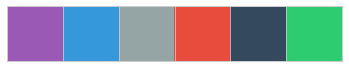

In [69]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

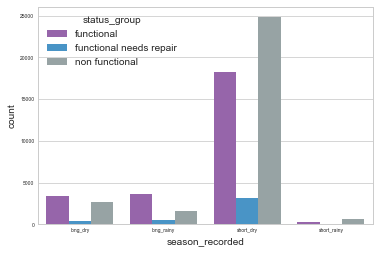

In [70]:
sns.set_style("whitegrid")

ax = sns.countplot(x='season_recorded', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('season_recorded',fontsize=10)
ax.figure.savefig('ax_season_recorded.png', dpi = 1000)

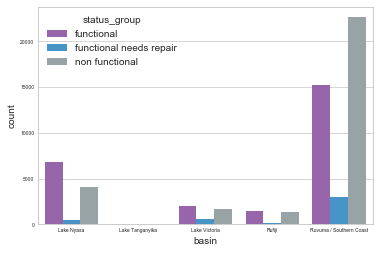

In [71]:
ax = sns.countplot(x='basin', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('basin',fontsize=10)
ax.figure.savefig('ax_basin.png', dpi = 1000)

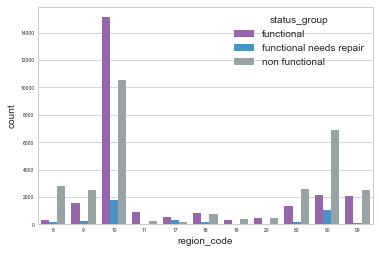

In [72]:
ax = sns.countplot(x='region_code', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('region_code',fontsize=10)
ax.figure.savefig('ax_region_code.png', dpi = 1000)

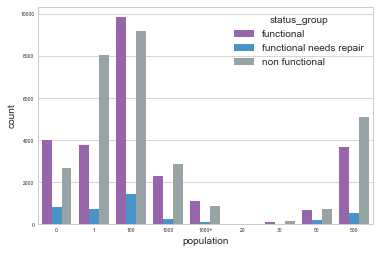

In [73]:
ax = sns.countplot(x='population', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('population',fontsize=10)
ax.figure.savefig('ax_popoulation.png', dpi = 1000)

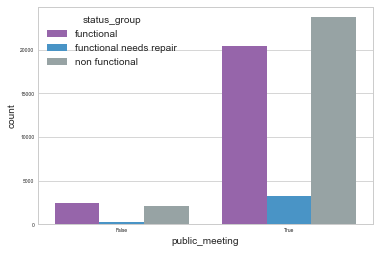

In [74]:
ax = sns.countplot(x='public_meeting', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('public_meeting',fontsize=10)
ax.figure.savefig('ax_public_meeting.png', dpi = 1000)

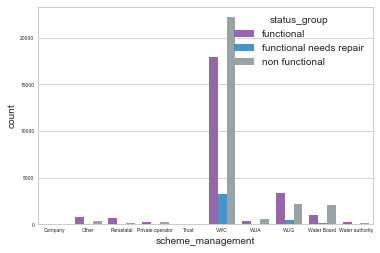

In [75]:
ax = sns.countplot(x='scheme_management', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('scheme_management',fontsize=10)
ax.figure.savefig('ax_scheme_management.png', dpi = 1000)

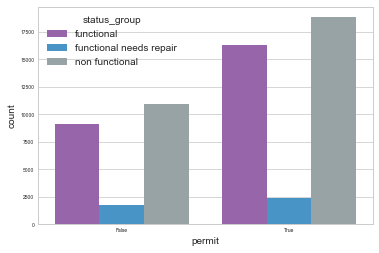

In [76]:
ax = sns.countplot(x='permit', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('permit',fontsize=10)
ax.figure.savefig('ax_permit.png', dpi = 1000)

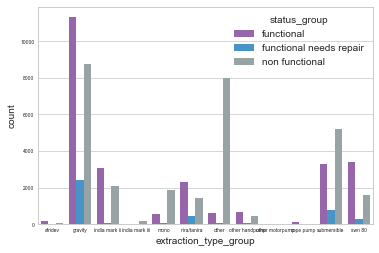

In [77]:
ax = sns.countplot(x='extraction_type_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('extraction_type_group',fontsize=10)
ax.figure.savefig('ax_extraction_type_group.png', dpi = 1000)

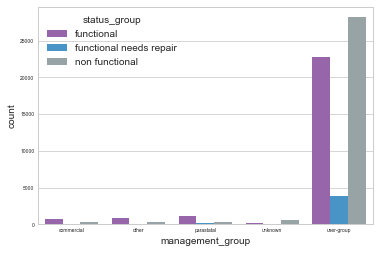

In [78]:
ax = sns.countplot(x='management_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('management_group',fontsize=10)
ax.figure.savefig('ax_management_group.png', dpi = 1000)

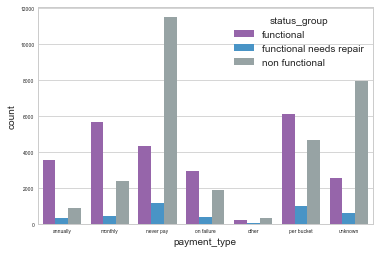

In [79]:
ax = sns.countplot(x='payment_type', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('payment_type',fontsize=10)
ax.figure.savefig('ax_payment_type.png', dpi = 1000)

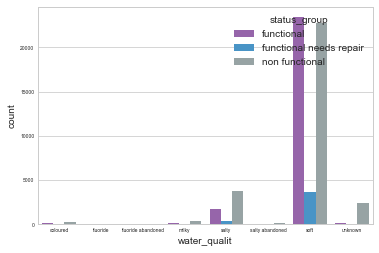

In [80]:
ax = sns.countplot(x='water_quality', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('water_qualit',fontsize=10)
ax.figure.savefig('ax_water_qualit.png', dpi = 1000)

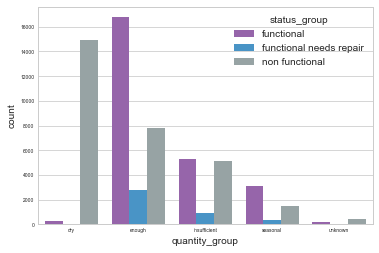

In [81]:
ax = sns.countplot(x='quantity_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('quantity_group',fontsize=10)
ax.figure.savefig('ax_quantity_group.png', dpi = 1000)

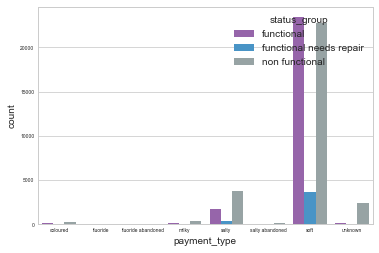

In [82]:
ax = sns.countplot(x='water_quality', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('payment_type',fontsize=10)
ax.figure.savefig('ax_payment_type.png', dpi = 1000)

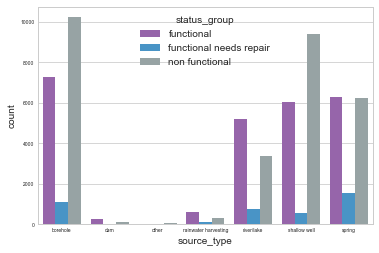

In [83]:
ax = sns.countplot(x='source_type', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('source_type',fontsize=10)
ax.figure.savefig('ax_source_type.png', dpi = 1000)

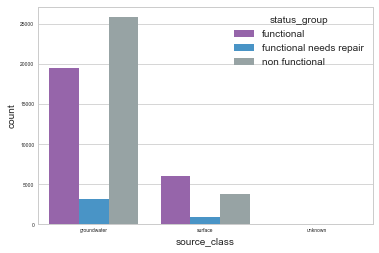

In [84]:
ax = sns.countplot(x='source_class', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('source_class',fontsize=10)
ax.figure.savefig('ax_source_class.png', dpi = 1000)

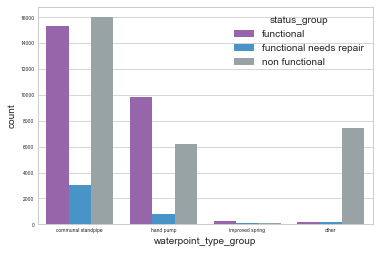

In [85]:
ax = sns.countplot(x='waterpoint_type_group', hue='status_group', data=df)
ax.tick_params(labelsize=5)
ax.set_xlabel('waterpoint_type_group',fontsize=10)
ax.figure.savefig('ax_waterpoint_type_group', dpi = 1000)

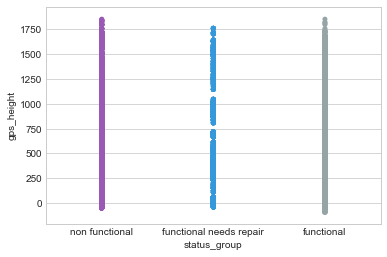

In [92]:
ax = sns.stripplot(x="status_group", y="gps_height", data=df, jitter=False, order=[ "non functional", "functional needs repair", "functional"])
ax.figure.savefig('ax_gps_height', dpi = 1000)

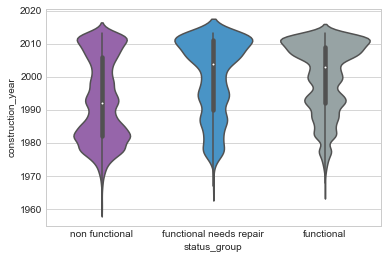

In [93]:
ax = sns.violinplot(x="status_group", y='construction_year', data=df, order=[ "non functional", "functional needs repair", "functional"])
ax.figure.savefig('ax_construction_year', dpi = 1000)

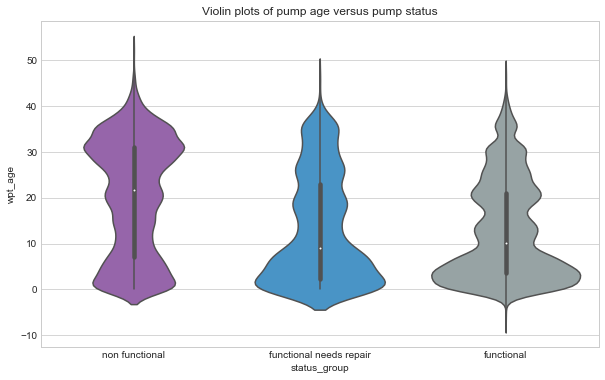

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.violinplot("status_group", y='wpt_age', data=df, order=[ "non functional", "functional needs repair", "functional"])
plt.title('Violin plots of pump age versus pump status')
plt.xlabel('status_group')
plt.ylabel('wpt_age')
plt.savefig('ax_wpt_age', dpi = 1000)
plt.show()